In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, f1_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import RidgeClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.optimizers import Adadelta
import pickle

In [28]:
size = 28
channel = 1

def plot_image(data, size=28):
    n = 10  
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(data[i].reshape(size, size))
        plt.gray()
        plt.axis('off')
    plt.show()

def benchmark_scikitlearn_classifiers(X_train, y_train, X_test, y_test):
    
    models = [RidgeClassifier(tol=1e-2, solver="lsqr"),RandomForestClassifier(n_estimators=50),
        PassiveAggressiveClassifier(n_iter=50), KNeighborsClassifier(n_neighbors=1), GradientBoostingClassifier()]
    
    models_name = ['Ridge Classifier', 'Random Forest', 'Passive Aggressive Classifier', 'k Nearest Neighbour', 'Gradient Boosting Classifier']
    for i,model in enumerate(models):
        model.fit(X_train, y_train)
        predicted = model.predict(X_test)
        print(models_name[i]+' accuracy:', accuracy_score(y_test, predicted))
        print(classification_report(y_test, predicted)) 
        
def dnn(X_train, y_train, X_test, y_test, num_classes):
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
    
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=Adadelta(), loss='categorical_crossentropy',metrics=['accuracy'])
    
    model.fit(X_train, 
              y_train, 
              epochs=30, 
              batch_size=16,
              validation_data=(X_test, y_test))
    
    score = model.evaluate(X_test, y_test)
    print(score)
    
def cnn(X_train, y_train, X_test, y_test, num_classes):
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
    X_train = X_train.reshape(X_train.shape[0], size, size, channel)
    X_test = X_test.reshape(X_test.shape[0], size, size, channel)
    print(X_train.shape, X_test.shape)
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3),activation='relu',input_shape=(size,size,channel)))
    model.add(Conv2D(64, (3, 3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',optimizer=Adadelta(),metrics=['accuracy'])

    model.fit(X_train, y_train,
              batch_size=32,
              epochs=10,
              verbose=1,
              validation_data=(X_test, y_test))
    score = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

# MNIST Dataset

The dataset is in .csv format. The dataset is downloaded from kaggle website: https://www.kaggle.com/c/digit-recognizer

## Load dataset and visualize some samples

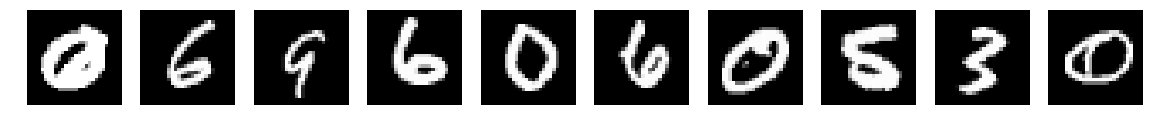

normalisasi


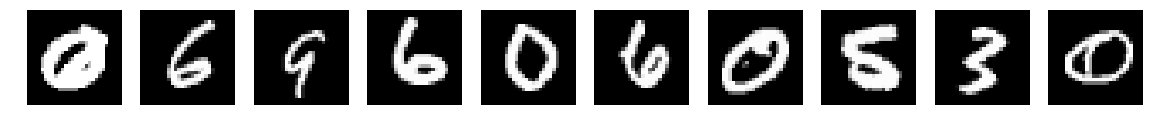

In [23]:
#load mnist csv with pandas
train = pd.read_csv('./MNIST-data/train.csv')
labels = np.asarray(train.iloc[:,0])
data = np.asarray(train.iloc[:,1:])
x_train, x_val, y_train, y_val = train_test_split(data, labels)

#visualize original samples 
plot_image(x_train[0:10])

#visualize normalize samples
print('normalized')
x_train_norm = x_train.astype('float32') / 255.
x_val_norm = x_val.astype('float32') / 255
plot_image(x_train_norm[0:10])

## Classification using several machine learning algorithms

In [28]:
#1. using original dataset
benchmark_scikitlearn_classifiers(x_train, y_train, x_val, y_val)
#2. using normalized dataset
benchmark_scikitlearn_classifiers(x_train_norm, y_train, x_val_norm, y_val)



Ridge Classifier accuracy: 0.8508571428571429
             precision    recall  f1-score   support

          0       0.89      0.96      0.92      1037
          1       0.81      0.97      0.88      1162
          2       0.91      0.78      0.84      1069
          3       0.83      0.83      0.83      1105
          4       0.82      0.88      0.85       977
          5       0.83      0.71      0.77       917
          6       0.89      0.93      0.91      1043
          7       0.84      0.87      0.85      1057
          8       0.85      0.76      0.80      1017
          9       0.85      0.80      0.82      1116

avg / total       0.85      0.85      0.85     10500

Random Forest accuracy: 0.9631428571428572
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      1037
          1       0.99      0.99      0.99      1162
          2       0.96      0.95      0.96      1069
          3       0.96      0.94      0.95      1105
      

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Passive Aggressive Classifier accuracy: 0.8625714285714285
             precision    recall  f1-score   support

          0       0.96      0.93      0.95      1037
          1       0.95      0.96      0.96      1162
          2       0.81      0.88      0.84      1069
          3       0.75      0.92      0.82      1105
          4       0.77      0.95      0.85       977
          5       0.86      0.73      0.79       917
          6       0.96      0.89      0.93      1043
          7       0.90      0.90      0.90      1057
          8       0.80      0.80      0.80      1017
          9       0.95      0.65      0.77      1116

avg / total       0.87      0.86      0.86     10500

k Nearest Neighbour accuracy: 0.9639047619047619
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      1037
          1       0.97      1.00      0.98      1162
          2       0.98      0.96      0.97      1069
          3       0.96      0.96      0.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Passive Aggressive Classifier accuracy: 0.8667619047619047
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1037
          1       0.93      0.98      0.95      1162
          2       0.92      0.81      0.86      1069
          3       0.73      0.92      0.82      1105
          4       0.86      0.91      0.88       977
          5       0.88      0.67      0.76       917
          6       0.93      0.95      0.94      1043
          7       0.96      0.84      0.89      1057
          8       0.70      0.87      0.78      1017
          9       0.91      0.74      0.82      1116

avg / total       0.88      0.87      0.87     10500

k Nearest Neighbour accuracy: 0.9639047619047619
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      1037
          1       0.97      1.00      0.98      1162
          2       0.98      0.96      0.97      1069
          3       0.96      0.96      0.

## Classification using Deep Learning approaches (MLP and CNN)

In [112]:
dnn(x_train, y_train, x_val, y_val, 10)

Train on 31500 samples, validate on 10500 samples
Epoch 1/30
31500/31500 [==============================] - 14s 430us/step - loss: 10.7638 - acc: 0.3159 - val_loss: 6.8102 - val_acc: 0.5660
Epoch 2/30
31500/31500 [==============================] - 13s 419us/step - loss: 7.2588 - acc: 0.5312 - val_loss: 3.8161 - val_acc: 0.7436
Epoch 3/30
31500/31500 [==============================] - 13s 416us/step - loss: 5.2692 - acc: 0.6509 - val_loss: 2.3978 - val_acc: 0.8385
Epoch 4/30
31500/31500 [==============================] - 13s 416us/step - loss: 4.0420 - acc: 0.7279 - val_loss: 2.0434 - val_acc: 0.8611
Epoch 5/30
31500/31500 [==============================] - 13s 416us/step - loss: 3.3586 - acc: 0.7720 - val_loss: 1.7386 - val_acc: 0.8811
Epoch 6/30
31500/31500 [==============================] - 13s 418us/step - loss: 3.0107 - acc: 0.7944 - val_loss: 1.6342 - val_acc: 0.8888
Epoch 7/30
31500/31500 [==============================] - 14s 432us/step - loss: 2.5943 - acc: 0.8221 - val_loss: 1

In [103]:
cnn(x_train, y_train, x_val, y_val, 10)

(31500, 28, 28, 1) (10500, 28, 28, 1)
Train on 31500 samples, validate on 10500 samples
Epoch 1/10
31500/31500 [==============================] - 145s 5ms/step - loss: 1.1918 - acc: 0.8147 - val_loss: 0.1032 - val_acc: 0.9692
Epoch 2/10
31500/31500 [==============================] - 143s 5ms/step - loss: 0.1755 - acc: 0.9497 - val_loss: 0.0793 - val_acc: 0.9788
Epoch 3/10
31500/31500 [==============================] - 143s 5ms/step - loss: 0.1117 - acc: 0.9678 - val_loss: 0.0657 - val_acc: 0.9821
Epoch 4/10
31500/31500 [==============================] - 136s 4ms/step - loss: 0.0901 - acc: 0.9733 - val_loss: 0.0643 - val_acc: 0.9837
Epoch 5/10
31500/31500 [==============================] - 133s 4ms/step - loss: 0.0772 - acc: 0.9784 - val_loss: 0.0528 - val_acc: 0.9858
Epoch 6/10
31500/31500 [==============================] - 137s 4ms/step - loss: 0.0625 - acc: 0.9813 - val_loss: 0.0559 - val_acc: 0.9864
Epoch 7/10
31500/31500 [==============================] - 153s 5ms/step - loss: 0.06

## Notes on MNIST Dataset

When several machine learning methods are benchmarking, Random Forest and k-Nearest Neighbour achieve the highest accuracy (96%) compare to other methods. And when original vs normalized-data are compared, their performance are similar.

When using deep learning approaches, Convolutional Neural Network achieves the best accuracy, about 98%. In CNN I used only 10 epochs, so there is possibility that accuracy will improe when epoch is increased.

# not-MNIST Dataset

The not-MNIST dataset is downloaded from https://www.kaggle.com/lubaroli/notmnist/data. The dataset consist of several images of character A, B, C, D, E, F, G, H, I and J. The images in '.png' format. In this model example, the images is already read into array data.  

In [11]:
#load small not-mnist dataset
train = pickle.load(open('notMNIST_small.npy','rb'))
labels = train.get('label')
data = train.get('data')


In [17]:
data = np.asarray(data)
data = data.reshape(data.shape[0],784)
labels = np.asarray(labels)
labels = labels.reshape(labels.shape[0],)


(18724, 784)
<class 'dict'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
18724 18724


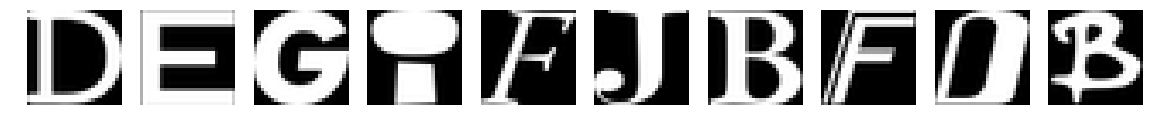

normalized


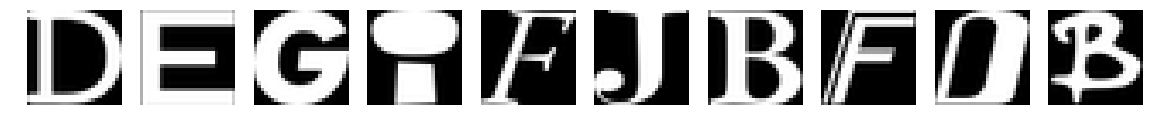

In [20]:
x_train, x_val, y_train, y_val = train_test_split(data, labels)

#samples visualization 
plot_image(x_train[0:10])

#normalized sample visualization
print('normalized')
x_train_norm = x_train.astype('float32') / 255.
x_val_norm = x_val.astype('float32') / 255
plot_image(x_train_norm[0:10])


## Classification using ensemble, linear and neighbors methods

In [32]:
#1. using original data
benchmark_scikitlearn_classifiers(x_train, y_train, x_val, y_val)
#2. using normalized data
benchmark_scikitlearn_classifiers(x_train_norm, y_train, x_val_norm, y_val)

Ridge Classifier accuracy: 0.8583635975218971
             precision    recall  f1-score   support

          0       0.89      0.88      0.89       461
          1       0.91      0.85      0.88       462
          2       0.83      0.91      0.87       473
          3       0.90      0.90      0.90       462
          4       0.91      0.77      0.84       469
          5       0.80      0.89      0.85       463
          6       0.88      0.85      0.87       464
          7       0.89      0.84      0.86       483
          8       0.75      0.85      0.80       432
          9       0.84      0.85      0.84       512

avg / total       0.86      0.86      0.86      4681

Random Forest accuracy: 0.9181798760948515
             precision    recall  f1-score   support

          0       0.90      0.95      0.93       461
          1       0.89      0.90      0.89       462
          2       0.95      0.94      0.95       473
          3       0.92      0.92      0.92       462
      

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Passive Aggressive Classifier accuracy: 0.8406323435163426
             precision    recall  f1-score   support

          0       0.91      0.88      0.90       461
          1       0.86      0.83      0.85       462
          2       0.89      0.89      0.89       473
          3       0.94      0.85      0.89       462
          4       0.82      0.78      0.80       469
          5       0.75      0.89      0.82       463
          6       0.93      0.82      0.87       464
          7       0.92      0.82      0.87       483
          8       0.59      0.88      0.71       432
          9       0.92      0.77      0.84       512

avg / total       0.86      0.84      0.84      4681

k Nearest Neighbour accuracy: 0.8641315958128605
             precision    recall  f1-score   support

          0       0.93      0.91      0.92       461
          1       0.85      0.84      0.84       462
          2       0.83      0.90      0.87       473
          3       0.83      0.88      0.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Passive Aggressive Classifier accuracy: 0.847468489638966
             precision    recall  f1-score   support

          0       0.87      0.87      0.87       461
          1       0.93      0.76      0.84       462
          2       0.90      0.89      0.90       473
          3       0.92      0.87      0.89       462
          4       0.86      0.76      0.81       469
          5       0.76      0.91      0.83       463
          6       0.88      0.83      0.86       464
          7       0.87      0.83      0.85       483
          8       0.70      0.85      0.77       432
          9       0.85      0.89      0.87       512

avg / total       0.85      0.85      0.85      4681

k Nearest Neighbour accuracy: 0.8641315958128605
             precision    recall  f1-score   support

          0       0.93      0.91      0.92       461
          1       0.85      0.84      0.84       462
          2       0.83      0.90      0.87       473
          3       0.83      0.88      0.8

## Classification using deep neural network and convolution neural network 

In [21]:
dnn(x_train, y_train, x_val, y_val, 10)

Train on 14043 samples, validate on 4681 samples
Epoch 1/30
14043/14043 [==============================] - 7s 481us/step - loss: 13.5736 - acc: 0.1521 - val_loss: 11.4973 - val_acc: 0.2811
Epoch 2/30
14043/14043 [==============================] - 6s 451us/step - loss: 12.3583 - acc: 0.2274 - val_loss: 10.6448 - val_acc: 0.3360
Epoch 3/30
14043/14043 [==============================] - 7s 464us/step - loss: 11.8652 - acc: 0.2596 - val_loss: 10.6446 - val_acc: 0.3358
Epoch 4/30
14043/14043 [==============================] - 8s 557us/step - loss: 11.2761 - acc: 0.2951 - val_loss: 9.6632 - val_acc: 0.3967
Epoch 5/30
14043/14043 [==============================] - 7s 483us/step - loss: 10.6428 - acc: 0.3342 - val_loss: 9.3079 - val_acc: 0.4213
Epoch 6/30
14043/14043 [==============================] - 7s 474us/step - loss: 10.0215 - acc: 0.3717 - val_loss: 8.2974 - val_acc: 0.4819
Epoch 7/30
14043/14043 [==============================] - 7s 487us/step - loss: 9.3353 - acc: 0.4150 - val_loss: 7

In [31]:
cnn(x_train, y_train, x_val, y_val, 10)

(14043, 28, 28, 1) (4681, 28, 28, 1)
Train on 14043 samples, validate on 4681 samples
Epoch 1/10
14043/14043 [==============================] - 86s 6ms/step - loss: 4.2658 - acc: 0.5883 - val_loss: 0.4164 - val_acc: 0.8808
Epoch 2/10
14043/14043 [==============================] - 86s 6ms/step - loss: 0.5599 - acc: 0.8415 - val_loss: 0.3159 - val_acc: 0.9062
Epoch 3/10
14043/14043 [==============================] - 79s 6ms/step - loss: 0.4314 - acc: 0.8762 - val_loss: 0.2884 - val_acc: 0.9150
Epoch 4/10
14043/14043 [==============================] - 83s 6ms/step - loss: 0.3512 - acc: 0.8984 - val_loss: 0.2544 - val_acc: 0.9276
Epoch 5/10
14043/14043 [==============================] - 78s 6ms/step - loss: 0.3095 - acc: 0.9086 - val_loss: 0.2446 - val_acc: 0.9312
Epoch 6/10
14043/14043 [==============================] - 81s 6ms/step - loss: 0.2830 - acc: 0.9183 - val_loss: 0.2319 - val_acc: 0.9351
Epoch 7/10
14043/14043 [==============================] - 119s 8ms/step - loss: 0.2523 - acc

## Notes on not-MNIST Dataset

The not-MNIST dataset seems more complex compare to MNIST dataset. When using machine learning approaches, the best accuracy is about 92% that is achieved by Random Forest and Gradient Boosting Classifier.
When using deep learning approaches, the CNN can achieve accuracy around 94%